## Access Satellite Chlorophyll-a GSM 1Day Aqua data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_chlorophylla_gsm_1day_aqua dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/f73daf07-eb81-4995-a72a-ca903834509f).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_chlorophylla_gsm_1day_aqua.ipynb).

In [1]:
dataset_name = "satellite_chlorophylla_gsm_1day_aqua"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 22ms


✅ Local version 0.2.1 is up to date (remote: 0.2.1)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 525 ms, sys: 53.1 ms, total: 578 ms
Wall time: 1.37 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 8040 ;
	latitude = 7001 ;
	longitude = 10001 ;

variables:
	float64 chl_gsm(time, latitude, longitude) ;
		chl_gsm:flag_applied = HISATZEN LAND CLDICE NAVFAIL ;
		chl_gsm:long_name = Chlorophyll Concentration, GSM model ;
		chl_gsm:units = mg/m^3 ;
	float64 latitude(latitude) ;
		latitude:axis = Y ;
		latitude:long_name = latitude ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float64 longitude(longitude) ;
		longitude:axis = X ;
		longitude:long_name = longitude ;
		longitude:standard_name = longitude ;
		longitude:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:axis = T ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = File initialised at 2024-04-08T06:27:10.388580
Initialised var chl_gsm at 2024-04-08T06:27:39.297634
Add Granule A20240404_0345.20240408031502.L2OC_BASE.chl_gsm.nc at 2024-04-08T06:27:40.687839
Add Granule A20240404_0350.20240

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2002-07-04 05:30:00'), Timestamp('2024-11-29 05:30:00'))

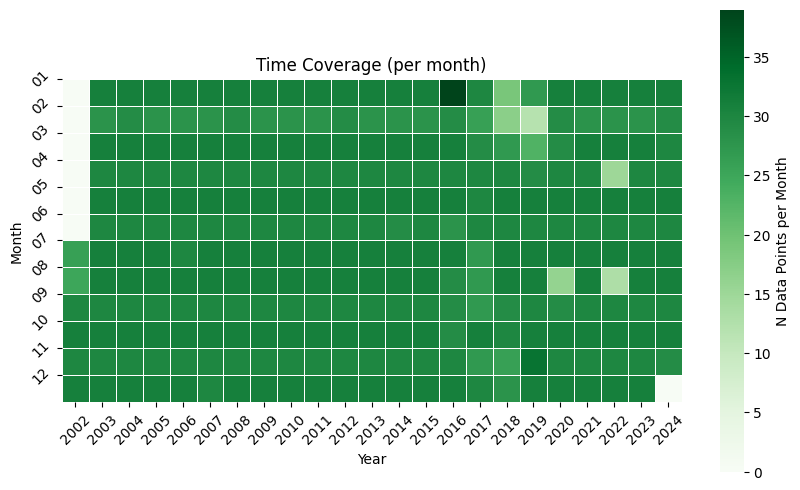

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

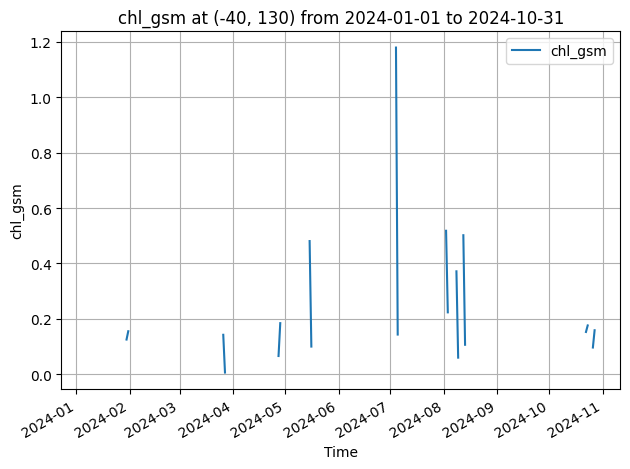

CPU times: user 1.68 s, sys: 292 ms, total: 1.97 s
Wall time: 5.54 s


In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='chl_gsm', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2024-01-01', 
                                                  date_end='2024-10-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude").plot_timeseries()

## Plot a gridded variable

2025-06-11 17:02:17,645 - aodn.GetAodn - INFO - Plotting 'Chlorophyll Concentration, GSM model' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2510: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


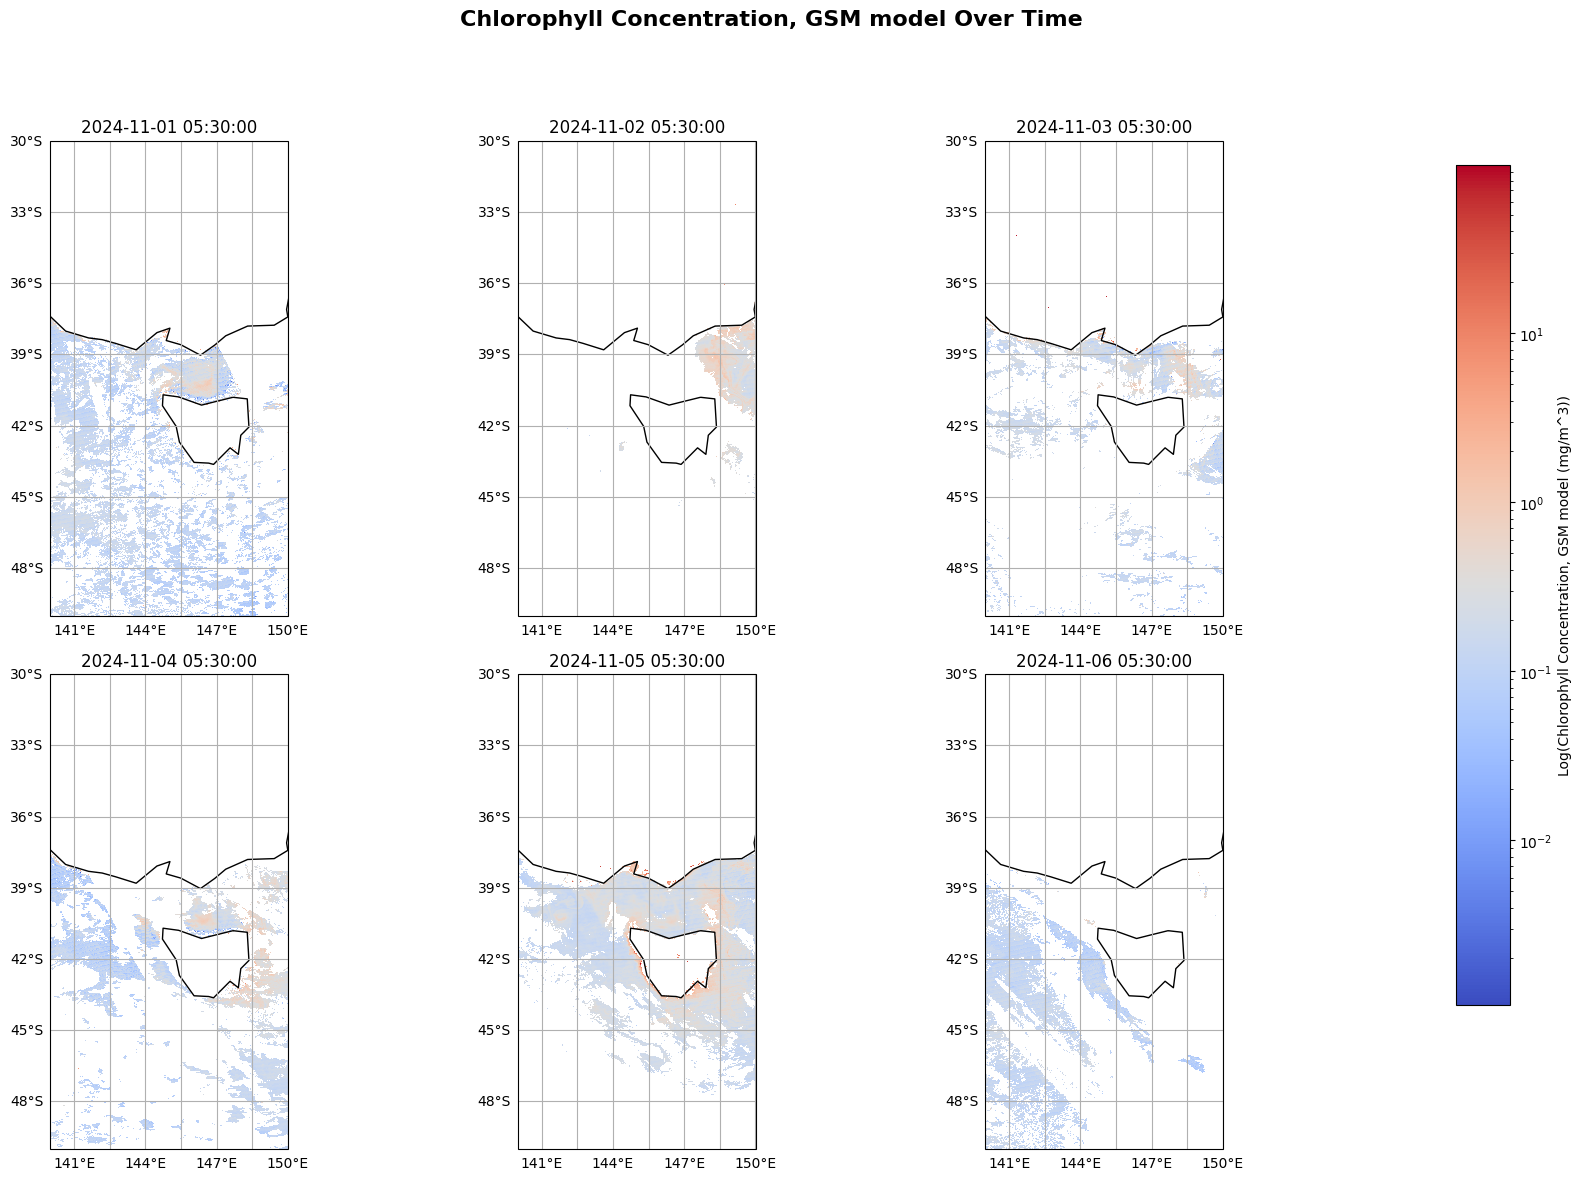

CPU times: user 8.31 s, sys: 4.82 s, total: 13.1 s
Wall time: 16 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='chl_gsm', 
                                                    date_start='2024-11-01', 
                                                    lon_name_override="longitude", 
                                                    lat_name_override="latitude", 
                                                    lon_slice=(140, 150),
                                                    lat_slice=(-50, -30),
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    log_scale=True)